# **<font color=white> 04.LOF Code 실습**

[목적]
  - Local Outlier Factor Code 실습
  - Multivariate variable (다변량)일 때 사용
  - 각 Data마다 Score를 계산하여 Abnormal을 산출 할 수 있음
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [1]:
%pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.neighbors import LocalOutlierFactor

In [3]:
# Data Loading
X, Y = generate_data(behaviour='new', n_features=10, 
                     train_only=True,
                     contamination=0.1,
                     random_state=2023)

In [4]:
# Naming for columns
col_list = []
for i in range(X.shape[1]):
    a = 'X{}'.format(i+1)
    col_list.append(a)

In [5]:
# Columns Name
col_list

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']

In [6]:
# Make DF
df = pd.DataFrame(X, columns = col_list)
df['Y'] = Y

In [7]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8.147125,6.595282,6.353558,6.653506,8.134808,7.426514,6.474067,7.230509,7.457418,6.916700,0.0
1,6.872178,6.596448,7.349710,7.097543,7.024347,6.615302,6.753538,7.218030,7.819604,6.563562,0.0
2,6.910465,5.856827,6.495701,6.598612,8.042650,6.205240,7.024534,6.822316,7.475852,7.106808,0.0
3,6.901166,6.942458,6.354764,6.447391,6.595218,7.941335,6.104982,6.930397,8.076817,7.715245,0.0
4,7.465372,6.305800,7.858624,6.456638,7.610647,6.530033,7.509274,7.636209,7.650121,7.043726,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.018529,5.163813,5.468692,-2.640285,-0.578817,1.487439,2.359938,-6.462774,2.466932,1.323520,1.0
996,3.328107,0.614357,5.886779,6.717434,2.906959,-6.980421,2.245124,-2.790132,-4.169568,0.832299,1.0
997,4.516967,-5.648011,-5.330594,-6.352683,-1.796092,5.129173,3.517025,-0.234736,1.941775,5.095802,1.0
998,2.223976,-4.295404,2.192168,1.202558,5.348682,3.638888,5.204538,2.540078,-5.530535,5.884657,1.0


Text(0.5, 1.0, 'Ground Truth')

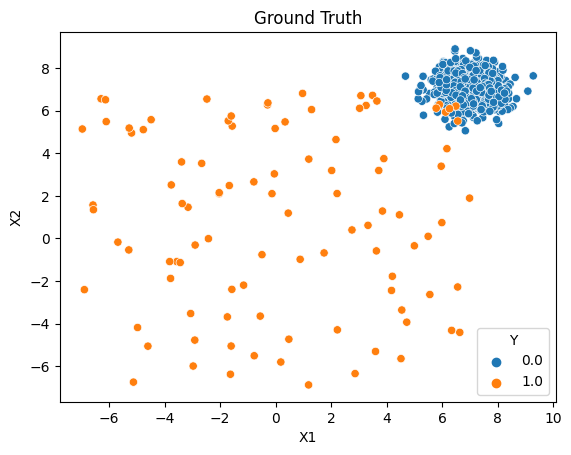

In [8]:
# Data 분포 확인하기 X1, X2
sns.scatterplot(x='X1', y='X2', hue='Y', data=df);
plt.title('Ground Truth')

[Local Outlier Factor Parameter]
  - package : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
  - n_neighbors : 밀도를 계산하고자 하는 주변 관측치 개수
  - algorithm : ['auto', 'ball_tree', 'kd_tree', 'brute'], default='auto'
     - 가까운 이웃을 계산하는데 쓰이는 알고리즘
  - leaf_size : Tree algorithm에서 leaf node의 개수, default=30
     - 'ball_tree', 'KD_Tree'를 사용할때 사용되는 parameter
  - metric : ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'minkowski'], default='minkowski'
  - p : minkowski를 사용할때 사용되는 param
     - When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
     - 따라서, Metric 쪽을 그냥 가만히 냅두면 Just euclidean_distance

In [9]:
# LOF Setup
LOF = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_pred = LOF.fit_predict(df[['X1', 'X2']])

In [10]:
df['Y']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: Y, Length: 1000, dtype: float64

In [11]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [12]:
# LOF Setup
LOF = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_pred = LOF.fit_predict(df[['X1', 'X2']])

for i in range(y_pred.shape[0]):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

n_errors = (y_pred != df['Y']).sum()
X_scores = LOF.negative_outlier_factor_

In [13]:
n_errors

172

In [14]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [15]:
radius

array([2.66198055e-02, 4.82741773e-02, 7.29723224e-02, 1.93308014e-02,
       2.11824704e-02, 4.02571996e-02, 1.68277443e-02, 2.16373668e-02,
       2.13215927e-02, 2.91579740e-02, 2.27158793e-02, 1.07845488e-02,
       1.54276638e-02, 4.37850310e-02, 2.44853969e-01, 2.42051955e-02,
       4.02390506e-02, 2.25780713e-02, 7.08678300e-02, 2.03333562e-02,
       2.77721601e-02, 1.30022415e-01, 2.09368851e-02, 2.76268143e-02,
       1.98698587e-01, 2.41340542e-02, 1.86827870e-02, 5.01374859e-02,
       2.59937315e-02, 1.32555795e-01, 2.19093129e-02, 2.59186224e-02,
       1.95745420e-02, 1.52855292e-02, 1.97580080e-02, 2.89571688e-02,
       3.74236914e-02, 2.41839980e-02, 2.90097821e-02, 1.74761099e-01,
       3.11472371e-02, 8.73505727e-03, 3.84798852e-02, 2.96926165e-02,
       2.68697246e-02, 2.11191585e-02, 2.18393243e-02, 5.86008402e-02,
       1.95061410e-02, 2.47858861e-02, 2.66233623e-02, 3.96079487e-02,
       6.85516903e-02, 3.96072039e-02, 3.70686994e-02, 1.98583552e-02,
      

In [16]:
X_scores

array([-1.0050688 , -1.05786624, -1.11808499, -0.98729683, -0.99181155,
       -1.03831934, -0.9811939 , -0.99292067, -0.99215075, -1.01125733,
       -0.99555029, -0.96645945, -0.97778024, -1.04692086, -1.53716491,
       -0.99918152, -1.03827509, -0.99521428, -1.11295384, -0.98974124,
       -1.00787845, -1.25718389, -0.99121276, -1.00752407, -1.42462937,
       -0.99900806, -0.98571685, -1.06240934, -1.00354231, -1.26336075,
       -0.99358372, -1.00335918, -0.98789111, -0.97743369, -0.98833844,
       -1.01076773, -1.03141071, -0.99912984, -1.01089601, -1.36626525,
       -1.01610753, -0.9614624 , -1.03398591, -1.01256089, -1.00567815,
       -0.99165718, -0.99341308, -1.0830446 , -0.98772434, -1.00059735,
       -1.00507747, -1.03673634, -1.10730665, -1.03673453, -1.03054517,
       -0.9885831 , -1.05476868, -1.03571554, -1.04742405, -1.02632855,
       -1.18475142, -1.01854699, -1.528342  , -0.99507125, -0.9914553 ,
       -1.05078837, -1.30608516, -0.97903145, -1.11375833, -1.06

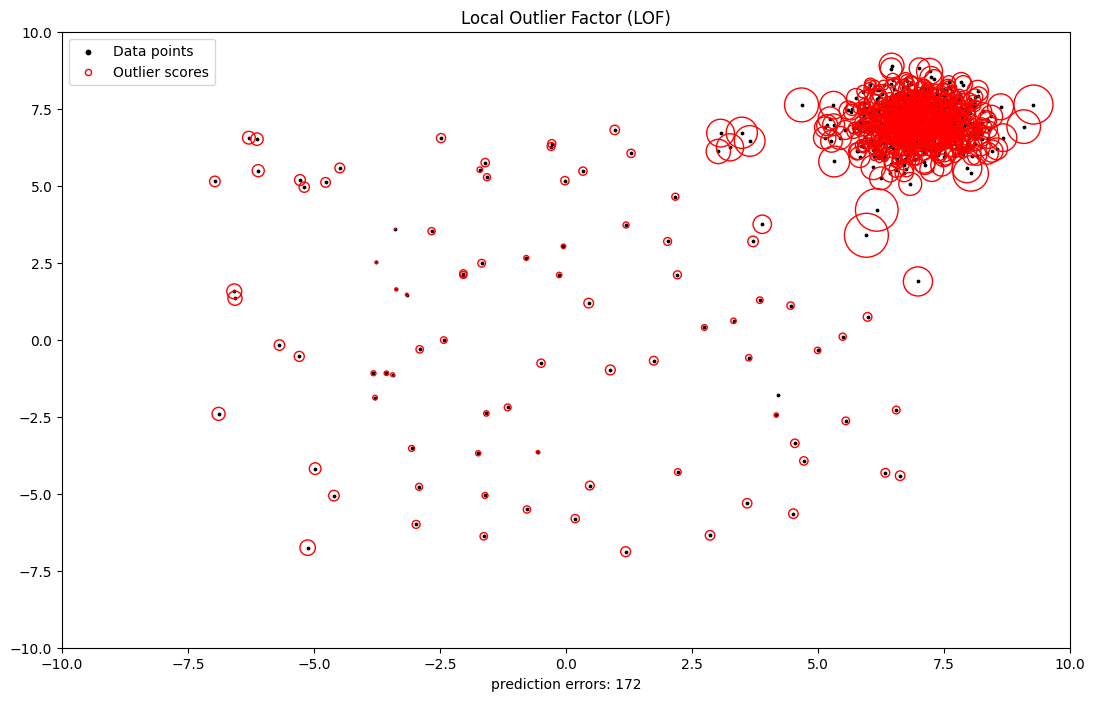

In [17]:
plt.figure(figsize=(13,8))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale
plt.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

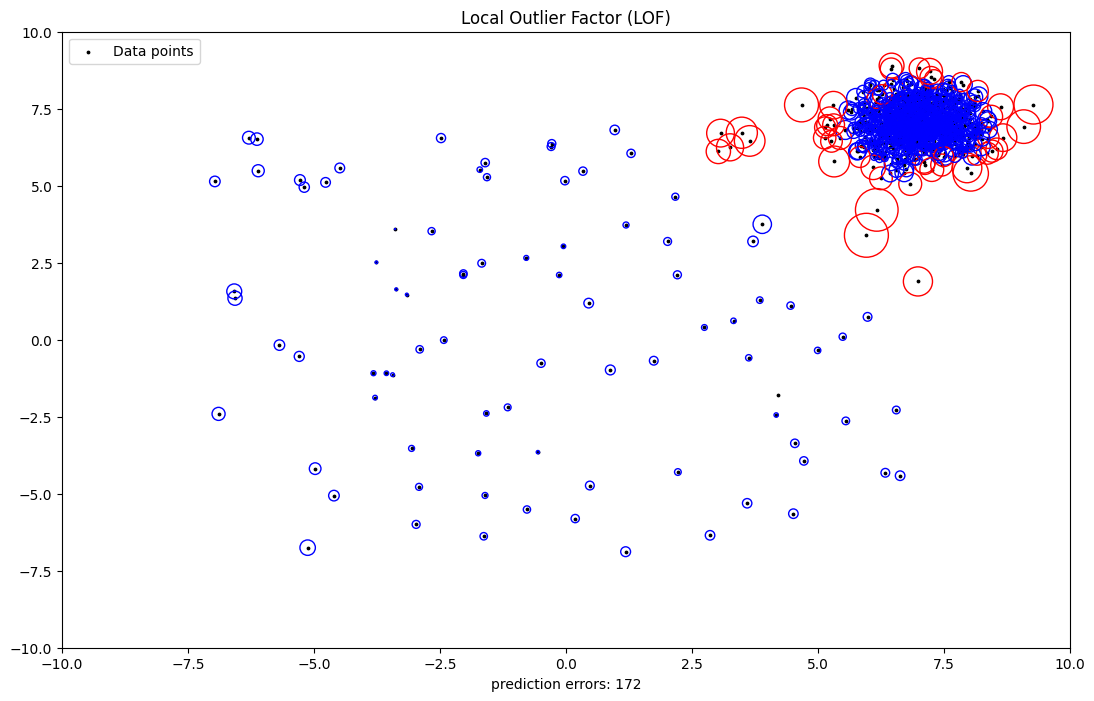

In [18]:
plt.figure(figsize=(13,8))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if radius[i] >= np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif radius[i] < np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

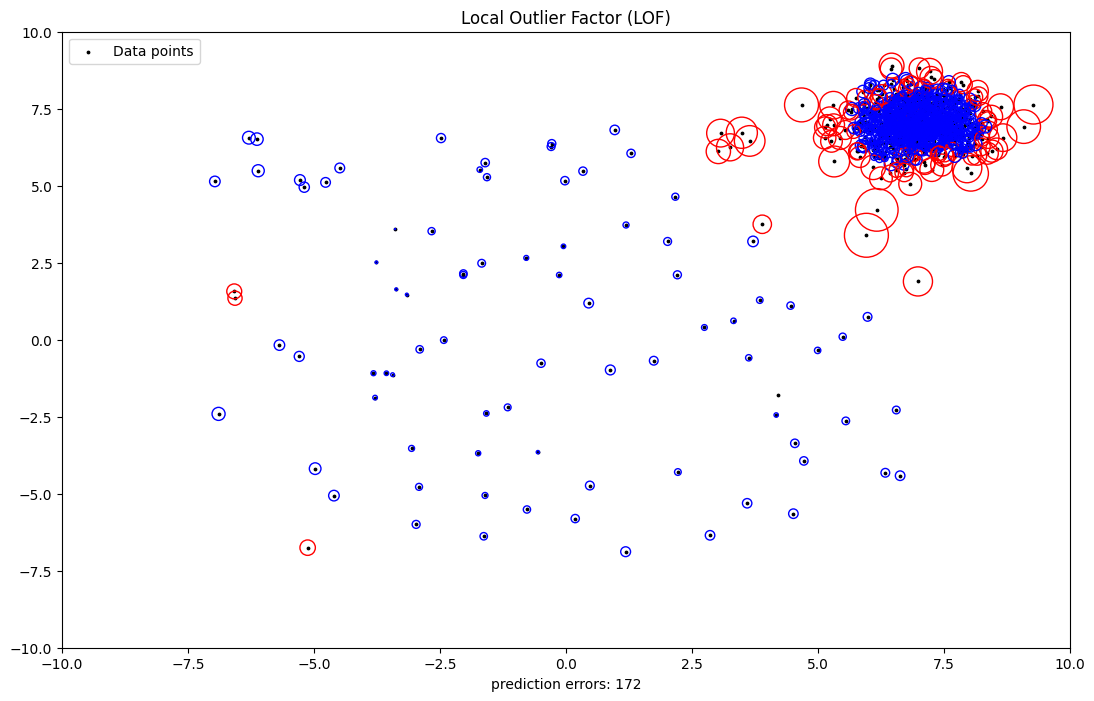

In [19]:
plt.figure(figsize=(13,8))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if y_pred[i] == 1:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif y_pred[i] == 0:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()